<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Python and Jupyter Notebook 
- Summary statistics of data sets

<hr/>

<h1><font color="darkblue">Descriptive Statistics</font></h1>

## Data Sets

Q: What is a _data set_?

Most generally: Collection of numbers (1D or higher dimensional) associated to "something" we want to understand and/or predict.

For example, a set of $N$ scalar measurements 

>$ \displaystyle \big\{x_i\big\}_{i=1}^N $.

#### Example: Maximum temperature at a weather station in different years. 

http://unstats.un.org/unsd/snaama/selbasicFast.asp.

http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt

Corresponds to maximum temperatures in Oxford, England in $N=150$ different years.

### How to characterize the data?

Powerful idea: 

Consider data points $ \displaystyle \big\{x_i\big\}_{i=1}^N $ to be **samples** from a **(probability) distribution** which is _unknown_ a priori.

Therefore: How to obtain estimates of

- Location,
- Dispersion,
- Shape

of data set?

- Histograms

## Jupyter Notebooks
- Interactive data analysis made easy
- And here is how you do it

### Some basic Python

With the following line, we use a for-loop to create a _list_:

In [ ]:
list1 = [i*i for i in range(5)]
list1

In [ ]:
len(list1)

### [numpy](https://numpy.org/doc/stable/)

One of most important Python packages for our purposes.

Some features:
  - Manipulation of multidimensional arrays (simple data representation)
  - Common mathematical functions, such as linear algebra operations
  - Pseudo-random number generation for sampling from distributions

In [4]:
# Let's first import the numpy module.
import numpy as np # it is a very common convention to import numpy as "np" (since shorter) 

We simulate a data set that behaves like a _standard normal distribution_:

In [5]:
N = 1000;
x = np.random.randn(N);

In [6]:
print (x[0])

0.3635891253821584


In [ ]:
# indexing from 0
print ("%f, %f, ..., %f , %f" % (x[0], x[1], x[N-2], x[N-1]))

# last element: Can be also accessed via index "-1":
print ("%f = %f" % (x[N-1], x[-1]))

In [ ]:
# another way of printing some of the data
for i in (range(0,4) and range(N-3,N)):
    print ("%d : \t %r" % (i, x[i]))

In [ ]:
# example of error due to index out of bounds
for i in range(N-3,N+1):
    print ("%d : \t %r" % (i, x[i]))

In [ ]:
# error handling with exceptions
for i in range(N-3,N+5):
    try: 
        print ("%d : \t %r" % (i, x[i]))
    except IndexError as err: 
        print (err)

### [matplotlib](https://matplotlib.org)

A very popular and powerful Python package for visualization and plotting.

  - line charts
  - scatter plots
  - histograms

Sometimes a lot of scrolling through documentation needed in order to obtain what you want.

In [2]:
import matplotlib.pyplot as plt # common convention to import matplotlib.pyplot as "plt"

The following useful _magic commands_ use IPython and are Jupyter-specfic (start with "%"), cf. https://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magic:

With "inline", plots created by matplotlib appear below cell in line.

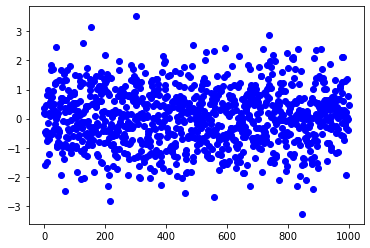

In [7]:
%matplotlib inline
plt.plot(x,'bo');

With "notebook", plots created by matplotlib are interactive. Especially helpful for more complicated visualizations (e.g., 3D).

<IPython.core.display.Javascript object>


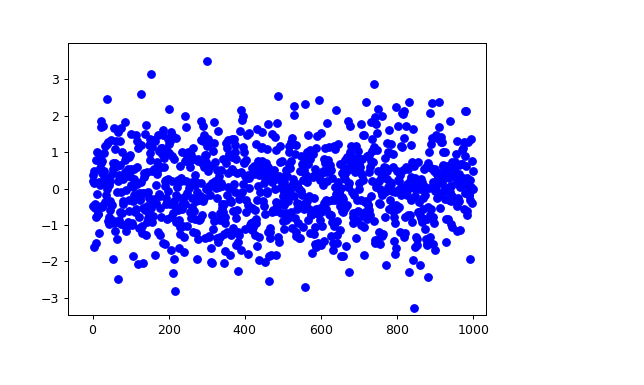

In [8]:
%matplotlib notebook
plt.plot(x,'bo');

Let's work with "inline" as a default, unless interactivity is needed.

In [9]:
%matplotlib inline

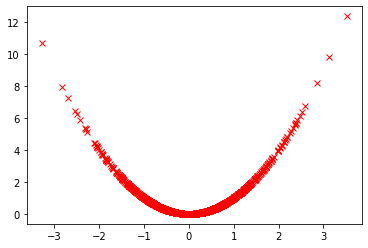

In [12]:
plt.plot(x,x*x,'rx');

**Q:** Do you understand why this plot looks like a parabola despite the random samples?

### Histogram

A **histogram** of a sample 1D sample array is a bar plot on which the $x$-axis indicates a certain range of sample values, and the $y$-axis indicates how many samples are contained in the respective range.

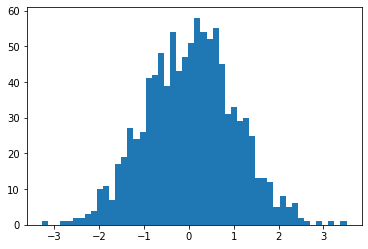

In [15]:
h = plt.hist(x,bins=50)

### Location

Some quantities describing properties of the dataset are the following.

- **Sample average** (also called **sample mean**)

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$
<br><br>
> but indexing starts with 0 in Python and most computer languages
<br><br>
> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_i$

Using numpy, it can be computed as follows:

In [18]:
avg = np.sum(x) / N 
avg, np.mean(x)

(0.03956383215952083, 0.03956383215952083)

In [22]:
type(N),type(x.size)

(int, int)

In [19]:
sum(x)/N, x.sum()/x.size # this uses the native Python commands instead of numpy functions

(0.03956383215952086, 0.03956383215952083)

In [24]:
type(sum(x)),type(x.sum())

(numpy.float64, numpy.float64)

- **Sample median**

> The number **sample median** is such that half of the samples are _larger_, and half of the samples are _smaller_.

In [25]:
med = np.median(x)
med

0.058763270705214754

- **Mode** 

> Informally, where it peaks
<br>
> unimodal vs multimodal

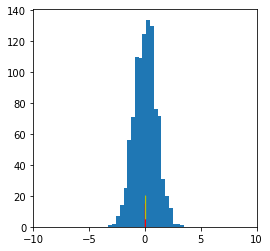

In [26]:
fig = plt.figure(figsize=(4,4))  #define a figure size
ax = fig.add_subplot(1,1,1)   
ax.hist(x,20)
ax.arrow(avg,0,0,15,color='r') # Arrow from (avg,0) to (avg+0,0+15), indicating _average_ of distribution
ax.arrow(med,5,0,15,color='y') # Arrow from (med,5) to (med+0,5+15), indicating _median_ of distribution
ax.set_xlim(-10, 10);

### Dispersion
- Sample variance

> $\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$

- (Sample) standard deviation

> $\displaystyle s = \sqrt{s^2}$

In [27]:
s2   = np.sum( (x-avg)**2 ) /(N-1) # sample variance
s2

0.9881677546193893

In [34]:
b = np.var(x)   #easier way to calculate
np.sqrt(b)

0.9935691152933297

In [31]:
import statistics
statistics.variance(x)

0.9881677546193893

In [33]:
s = np.sqrt(s2)
s

0.9940662727501569

#### Exercise
- Why is $(N\!-\!1)$ in the denominator above?